# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the dataset

For demonstration purposes, let us take a 2 dimensional dataset with two features (Feature_1 and Feature_2) and consisting of two classes (Class A and Class B) having a distribution specifications as follows:

**Class A:** The Class A is centred around the mean of (-0.2,-0.2) and has the covariance matrix [[0.05,-0.035],[-0.035,0.05]]

**Class B:** The Class B is centred around the mean of (0.2,0.38) and has the covariance matrix [[0.05,0],[0,0.005]]

Defintions: 

**Mean:** A Class with centre (x1, x2) as mean denotes that the average value along "Feature_1" is x1 and the average value along "Feature_2" is x2

P.S: Since we would like to ensure that the outputs corrosponds to the desired output, we will also add the seed value of 42 while generating these distributions.



In [2]:
mean_01=np.array([-0.2,-0.2])
cov_01=np.array([[0.05,-0.035],[-0.035,0.05]])
mean_02=np.array([0.2,0.38])
cov_02=np.array([[0.05,0],[0,0.005]])
np.random.seed(42)
data_01=np.random.multivariate_normal(mean_01,cov_01,200, check_valid= "warn")
data_02=np.random.multivariate_normal(mean_02,cov_02,200, check_valid= "warn")
data = np.vstack((data_01,data_02))
df_train = pd.DataFrame(data, columns = ["Feature_1", "Feature_2"])
df_train["class"] = [-1]*200 + [1]*200 

# Visualising the dataset

In [3]:
## For Contributing, refer to expectedoutput1.html in the expected outputs folder.

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train["Feature_1"][:200],
    y=df_train["Feature_2"][:200],
    name="Class A",
    mode="markers",
    marker_color='rgba(84, 138, 252, 0.65)',
    marker_line_color='rgba(26, 9, 243, 0.8)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='circle',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class A<extra></extra>',
))

fig.add_trace(go.Scatter(
    x=df_train["Feature_1"][200:],
    y=df_train["Feature_2"][200:],
    name="Class B",
    mode="markers",
    marker_color='rgba(255, 117, 0, 0.65)',
    marker_line_color='rgba(255, 73, 0, 1)',
    marker_size = 10,
    marker_line_width = 1,
    marker_symbol='star-triangle-up',
    hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class B<extra></extra>'
))
fig.update_layout(
    title="Visualization of the dataset",
    xaxis_title="Feature_1",
    yaxis_title="Feature_2",
    legend_title="",
    width=800,
    height=800,
)

fig.show()

# Machine Learning Model

## Preparing training and test sets

In [4]:
np.random.seed(42)

In [5]:
X = df_train[["Feature_1","Feature_2"]].to_numpy()
Y = df_train[["class"]].to_numpy()

## Defining the model

In [6]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        np.random.seed(42)
        
    def hinge_loss(self,W,b,X,Y):
        temp=0
        for i in range(X.shape[0]):
            ti=Y[i]*(np.dot(W,X[i]) + b)
            temp+=max(0,1-ti)
        loss=0.5*(np.dot(W.T,W)) + self.C * temp
        return(loss[0][0])
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001):
        n_features,n_examples,n,c=X.shape[1],X.shape[0],learning_rate,self.C
        print(n_examples)
        theta_list = []
        W=np.zeros((1,n_features))
        b=0
        loss_list=[]
        for i in range(300):
            loss_list.append(self.hinge_loss(W,b,X,Y))
            indices=np.arange(n_examples)
            np.random.shuffle(indices)
            indices=indices[:batch_size]
            gradW,gradb=0,0
            for i in indices:
                ti=Y[i]*(np.dot(W,X[i]) + b)
                if ti>=1:
                    gradW +=0 
                    gradb +=0
                else:
                    gradW += c*(Y[i]*X[i])
                    gradb += c*Y[i]
            W = W - n*W + n*gradW
            b = b + n*gradb
            self.W=W
            self.b=b
            data = W[0].tolist()
            data.append(b[0])
            theta_list.append(data)
        return(W,b,theta_list,loss_list)

## Low penalty SVM

### Training the model

In [7]:
sv=SVM(0.5)
W,b,theta_list,loss_list=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

In [8]:
## For Contributing, refer to expectedoutput2.html in the expected outputs folder.

fig = go.Figure()

fig.add_trace(go.Scatter(
    x= list(range(1, 301)), 
    y=loss_list, 
    hovertemplate = '<b>Low Penality</b><br />Iteration: %{x} <br />Error: %{y}<extra></extra>',
    mode='markers',
    marker_color='rgba(100, 255, 87, 0.8)',
    marker_line_color='rgba(0, 0, 3,0.9)',
    marker_size = 5,
    marker_line_width = 0.7,
    
))


fig.update_layout(
    title="Visualising the error (Low Penalty)",
    xaxis_title = "Iteration",
    yaxis_title = "Error (Negative of maximum likelihood)",
    width=800,
    height=800,
)
fig.show()



### Visualising the decision boundry over iterations

In [9]:
## For Contributing, refer to expectedoutput3.html in the expected outputs folder.
np.random.seed(42)
iterations = np.arange(1,301) 
xx = np.linspace(-1,1,10)

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "No. of Iterations:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

for i in range(len(iterations)):
    slider_step = {'args': [
        [iterations[i]],{
            'frame': {'duration': 300, 'redraw': True},
            'mode': 'immediate',
            'transition': {'duration': 300}
        }],
    'label': str(iterations[i]),
    'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
# make figure
fig_dict = {
#     make data
    "data": [go.Scatter(x = df_train["Feature_1"][:200], 
                        y = df_train["Feature_2"][:200], 
                        name="Class A",
                        mode="markers", 
                        marker_color='rgba(84, 138, 252, 0.35)', 
                        marker_line_color='rgba(26, 9, 243, 1)', 
                        marker_size = 10, marker_line_width = 1, 
                        marker_symbol='circle', 
                        hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class A<extra></extra>'
                       ),
             go.Scatter(x = df_train["Feature_1"][200:], 
                        y=df_train["Feature_2"][200:], 
                        name="Class B", 
                        mode="markers", 
                        marker_color='rgba(255, 117, 0, 0.35)',
                        marker_line_color='rgba(255, 73, 0, 1)', 
                        marker_size = 10, 
                        marker_line_width = 1,
                        marker_symbol='star-triangle-up', 
                        hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class B<extra></extra>'
                       ), 
             go.Scatter(x = xx, 
                        y = -1*(theta_list[0][2]+xx*theta_list[0][0])/theta_list[0][1], 
                        mode="lines", 
                        name="Seperating Hyperplane", hoverinfo='skip',line=dict(color='black', width=2)),
             go.Scatter(x = xx, 
                        y = (1 -theta_list[0][2] - xx*theta_list[0][0])/theta_list[0][1], 
                        mode="lines", 
                        name="Positive Hyperplane", hoverinfo='skip',line=dict(color='green', width=2,
                              dash='dashdot')),
             go.Scatter(x = xx, 
                        y =(-1-theta_list[0][2]-xx*theta_list[0][0])/theta_list[0][1], 
                        mode="lines", 
                        name="Negative Hyperplane", hoverinfo='skip',line=dict(color='red', width=2,
                              dash='dashdot')),
            ],
    
    "layout": {},
    "frames": [go.Frame(data = [go.Scatter(x = df_train["Feature_1"][:200], 
                        y = df_train["Feature_2"][:200], 
                        name="Class A",
                        mode="markers", 
                        marker_color='rgba(84, 138, 252, 0.35)', 
                        marker_line_color='rgba(26, 9, 243, 1)', 
                        marker_size = 10, marker_line_width = 1, 
                        marker_symbol='circle', 
                        hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class A<extra></extra>'
                       ),
                       go.Scatter(x = df_train["Feature_1"][200:], 
                        y=df_train["Feature_2"][200:], 
                        name="Class B", 
                        mode="markers", 
                        marker_color='rgba(255, 117, 0, 0.35)',
                        marker_line_color='rgba(255, 73, 0, 1)', 
                        marker_size = 10, 
                        marker_line_width = 1,
                        marker_symbol='star-triangle-up', 
                        hovertemplate = 'Feature_1: %{x:.5f} <br />Feature_2: %{y:.5f}<extra></extra> Class B<extra></extra>'
                       ), 
                       go.Scatter(x = xx, 
                        y = -1*(theta_list[i][2]+xx*theta_list[i][0])/theta_list[i][1], 
                        mode="lines", 
                        name="Seperating Hyperplane", hoverinfo='skip',line=dict(color='black', width=2)),
                        go.Scatter(x = xx, 
                        y = (1 -theta_list[i][2]-xx*theta_list[i][0])/theta_list[i][1], 
                        mode="lines", 
                        name="Positive Hyperplane", hoverinfo='skip',line=dict(color='green', width=2,
                              dash='dashdot')),
                        go.Scatter(x = xx, 
                        y = (-1 -theta_list[i][2]-xx*theta_list[i][0])/theta_list[i][1], 
                        mode="lines", 
                        name="Negative Hyperplane", hoverinfo='skip',line=dict(color='red', width=2,
                              dash='dashdot'))], name = str(iterations[i])) for i in range(1,len(iterations))   
              ]
}

# make layout
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                 "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]


fig_dict["layout"]["sliders"] = [sliders_dict]
fig = go.Figure(fig_dict)

fig.update_layout( width=800, height=800, 
                 xaxis_title="Feature_1", yaxis_title="Feature_2", 
                 xaxis_range = [-1.1,1.1],
                  yaxis_range = [-1.1, 1.1],
                 title = "Visualising the convergence of decision boundary (Low Penalty)")
fig.show()

### Plotting the decision boundry

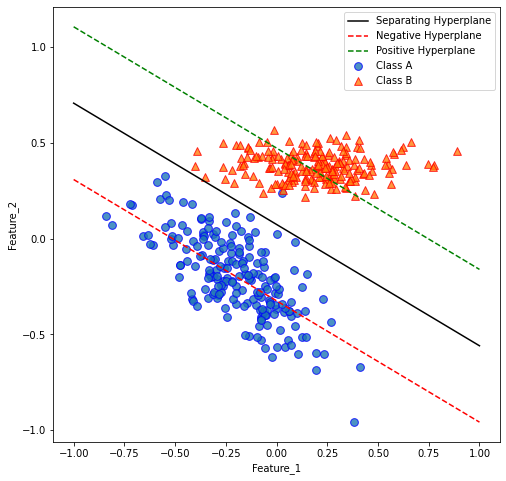

In [10]:
## For Contributing, refer to expectedoutput4.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()

## Mid penelty SVM

### Training the model

In [11]:
sv=SVM(10)
W,b,theta_list,loss_listt=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

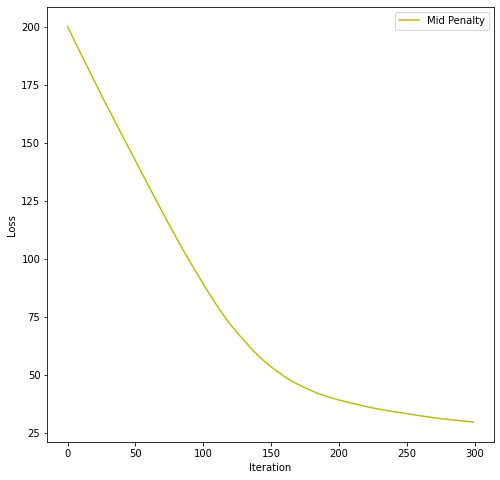

In [12]:
## For Contributing, refer to expectedoutput5.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_list,label="Mid Penalty",c='y')
plt.legend()
plt.show()

### Visualising the decision boundry over iterations

In [13]:
## For Contributing, refer to expectedoutput6.html in the expected outputs folder.


### Plotting the decision boundry

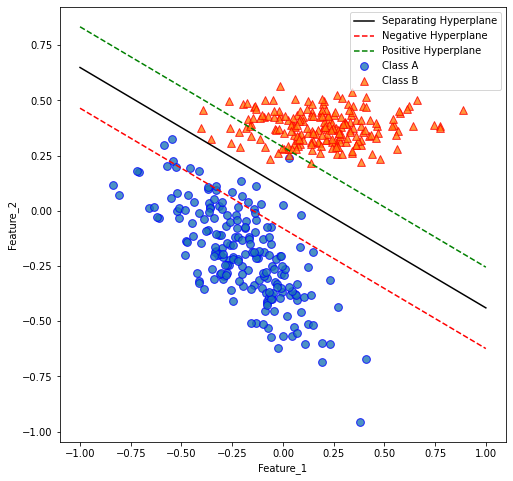

In [14]:
## For Contributing, refer to expectedoutput7.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()

## High penelty SVM

### Training the model

In [15]:
sv=SVM(1000)
W,b,theta_list,loss_listt=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

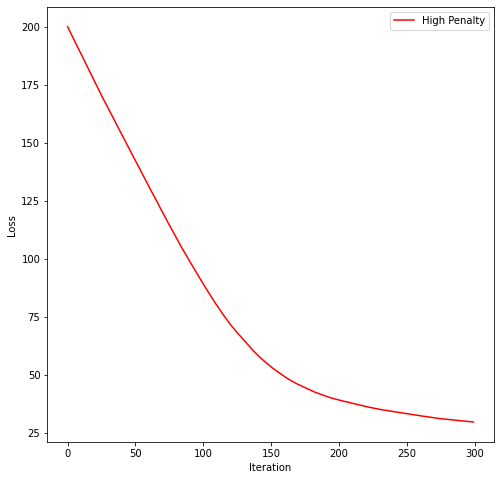

In [16]:
## For Contributing, refer to expectedoutput8.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_list,label="High Penalty",c='r')
plt.legend()
plt.show()

### Visualising the decision boundry over iterations

In [17]:
## For Contributing, refer to expectedoutput9.html in the expected outputs folder.


### Plotting the decision boundry

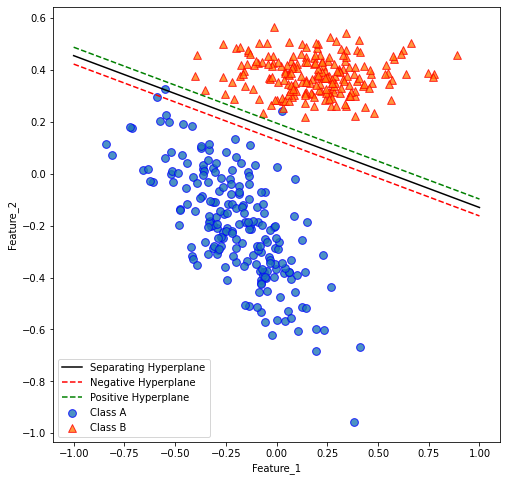

In [18]:
## For Contributing, refer to expectedoutput10.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()